In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("default")

In [2]:
x = np.array([2, 1])
np.linalg.norm(x)

2.23606797749979

In [3]:
x = np.array([2, 1])
np.linalg.norm(2*x)

4.47213595499958

http://word2vec.kr/search/

In [4]:
a = np.array([1, 1])
b = np.array([-1, 1])
a @ b

0

## CF 기반 추천 시스템
CF : 유사도 기반 평점 예측, 영화 추천, 음악 추천, ...등에 활용
* 사용자 기반 CF
* 아이템(하이브리드) 기반 CF
    * 사용자 정보가 적을 때
    * 여러 트랜젝션에서 중복 아이템이 적은 경우(의미있는 데이터 추출이 어려운 경우) <br>
    홍길동(트랜젝션): A, B(아이템) 임꺽정: C, D → 홍길동에서 추천할 것인? <br>
    서로 중복되는 데이터가 없어서 알 수 없음 <br>
    혹은 사람 특성을 비교해서 추천해줄 수 있다

In [5]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'암수살인':2.5, '바울':2, '할로윈':1},
    '나훈아':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [8]:
# critics["BTS"]  # critics["BTS2"] error 
critics.get("BTS") # critics.get("BTS2") None

{'암수살인': 5, '바울': 4, '할로윈': 1.5}

In [9]:
critics.get("BTS").get("암수살인")

5

In [10]:
# 피타고라스 거리
from math import sqrt
sqrt(pow(1, 2) + pow(3, 2))

3.1622776601683795

In [11]:
def sim(i, j):
    return sqrt(pow(i, 2) + pow(j, 2))

In [12]:
# 영화 평점 차이
var1 = critics["손흥민"]["바울"] - critics["조용필"]["바울"]
var2 = critics["손흥민"]["할로윈"] - critics["조용필"]["할로윈"]
sim(var1, var2)

3.1622776601683795

In [18]:
for i in critics:
    # 손흥민과 다른 사람과의 거리
    if i != "손흥민":
        var1 = critics["손흥민"]["바울"] - critics[i]["바울"]
        var2 = critics["손흥민"]["할로윈"] - critics[i]["할로윈"]
        print(i, 1/ (1+sim(var1, var2))) # 정규화

BTS 0.4721359549995794
조용필 0.2402530733520421
나훈아 0.2402530733520421


10편 영화, 100점 만점 평점
9편의 영화, 손 & B:  동일한 평점
1편의 영화 손:0, B: 100점 → 영향을 크게 받음

In [21]:
def sim_distance(data, user1, user2):
    # 유클라디안 기반 거리(같은 영화 본 것데 대한)
    rsum = 0
    for i in data[user1]: # 손흥민이 본 영화
        if i in data[user2]: # 다른 사람이 본 영화 중 손흥민이 본 영화와 같다면
            rsum += pow(data[user1][i]-data[user2][i], 2)
    return 1/(1+sqrt(rsum))

sim_distance(critics, "손흥민", "BTS")

0.4721359549995794

인원에 상관없이
정렬 → 가장 유사한 상위 n명 추출

In [30]:
# prototype
# top_match(영화 평점 딕셔너리, 기준, 상위 N명, 적용함수)
def top_match(data, name, n=2, sim_f=sim_distance):
#     rank = {}
#     for d in data:
#         if d != name:
#             rank[d] = sim_f(data, name, d)
#     print(rank)
#     rank_name = sorted(rank, key=lambda k : rank[k])
#     for i in range(n):
#         print(rank[rank_name[i]], rank_name[i])
    myList = []
    for i in data:
        if name != i:
            myList.append((sim_f(data, name, i), i))
    myList.sort()
    myList.reverse()
    return myList[:n]
top_match(critics, "손흥민")

[(0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]

In [31]:
critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '강감찬': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '을지문덕': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '김유신': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '유성룡': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '이황': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}

In [32]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [33]:
import matplotlib.pyplot as plt

[0, 5, 0, 5]

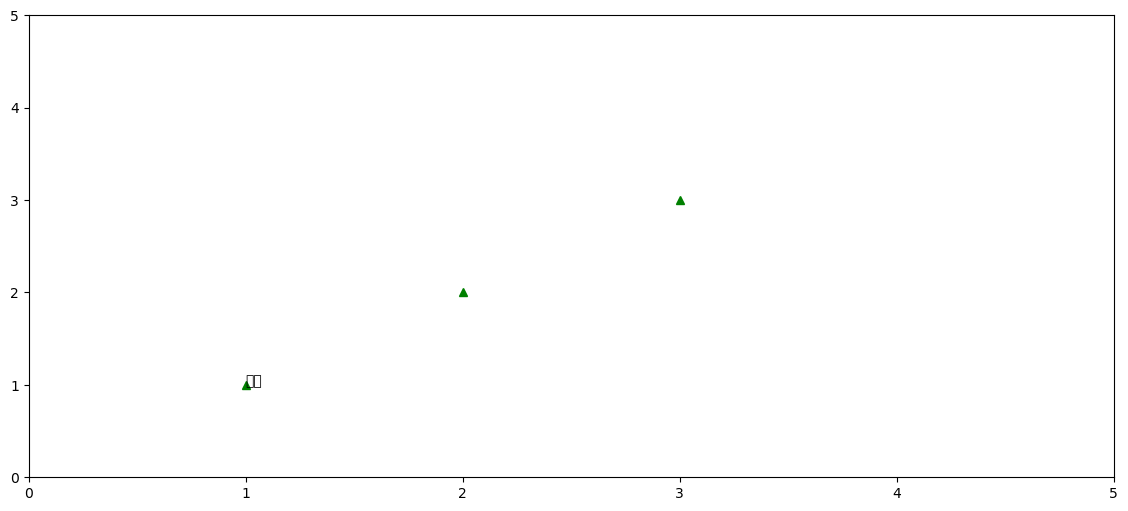

In [56]:
plt.figure(figsize=(14, 6))
plt.plot([1, 2, 3], [1, 2, 3], "g^")
plt.text(1, 1, "사과")
plt.axis([0, 5, 0, 5])

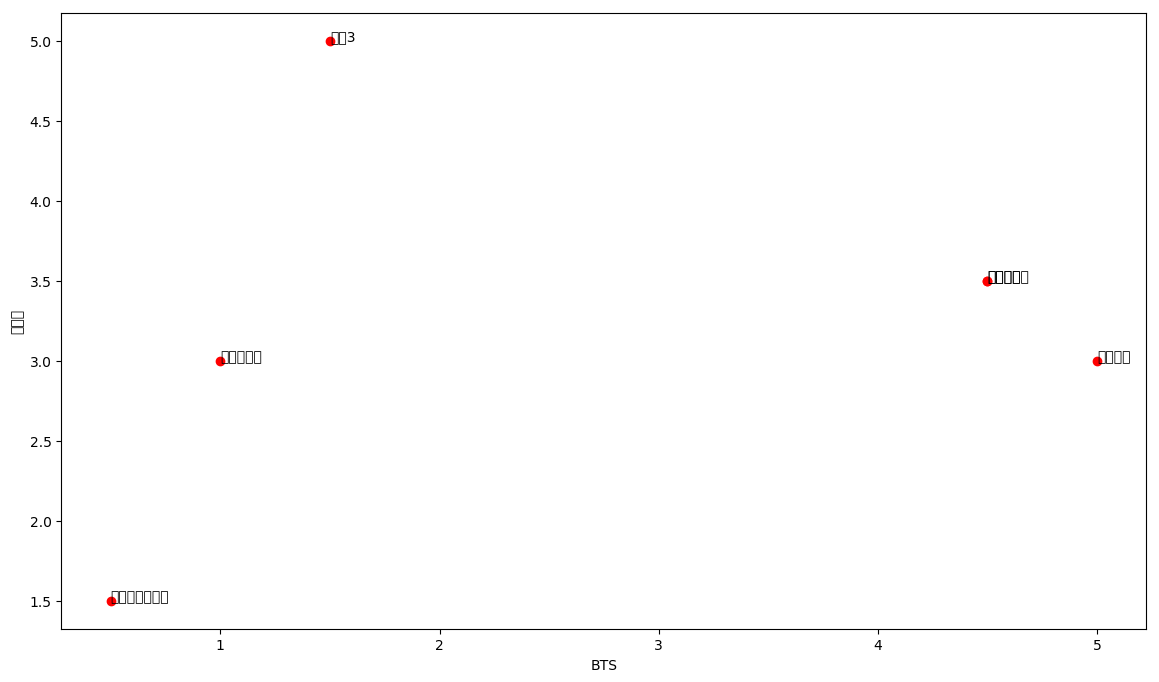

In [57]:
def drawGraph(data, name1, name2):
    li1, li2 = [], []
    plt.figure(figsize=(14, 8))
    for i in data[name1]:
        if i in data[name2]:
            li1.append(data[name1][i])
            li2.append(data[name2][i])
            plt.text(data[name1][i], data[name2][i], i)
    plt.plot(li1, li2, "ro")
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics, "BTS", "강감찬")

In [43]:
def sim_pearson(data, name1, name2):
    sumX = 0 # X의 합
    sumY = 0 # Y의 합
    sumPowX = 0 # X제곱의 합
    sumPowY = 0 # Y제곱의 합
    sumXY = 0 # X, Y의 합
    count = 0 # 영화 개수
    
    for i in data[name1] :
        for i in data[name2]: # 같은 영화를 평가한 경우
            sumX + =data[name1][i]
            sumY += data[name2][i]
            sumPowX += pow(data[name1][i],2)
            sumPowY += pow(data[name2][i],2)
            sumXY += data[name1][i]*data[name2][i]
            count += 1
            
    return (sumXY - ((sumX*sumY)/count))/ sqrt((sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))     

In [44]:
print(sim_pearson(critics, "BTS", "강감찬"))

0.2169304578186562


In [45]:
def top_match(data, name, n=3, sim_f=sim_pearson):
    myList = []
    for i in data:
        if name != i:
            myList.append((sim_f(data, name, i), i))
    myList.sort()
    myList.reverse()
    return myList[:n]

In [46]:
top_match(critics, "강감찬")

[(0.9637956818756316, '이황'),
 (0.39605901719066977, '조용필'),
 (0.3812464258315117, '이이')]

추천 시스템
1. 예상평점
- 예상 점수 : 유사도 * (상대방의) 평점 <br>
 ex) 강감찬이 안본 영화 중 A영화를 다른 사람들은 각각 4, 3, 2점 평점 줬다고 가정 <br>
 유사도는 각각 0.9, 0.3, 0.7이 나왔다 <br>
 0.9\*4점 → 3.6점 예상 <br>
 0.3\*3점 → 0.9점 예상 <br>
 0.7\*2점 → 1.4점 예상 <br>
 예상 점수 총합 = 5.9 / 1.9 (유사도 합) <br>
  → 약 3점 예상됨 <br>
  만약 A영화 3점, B영화 2점, C영화 4점으로 예상됐다면 강감찬에게 C 영화 추천

In [47]:
train = pd.read_csv("./res/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("./res/house-prices-advanced-regression-techniques/test.csv")

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [50]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
train_id = train["Id"]
test_id = test["Id"]

In [52]:
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [53]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

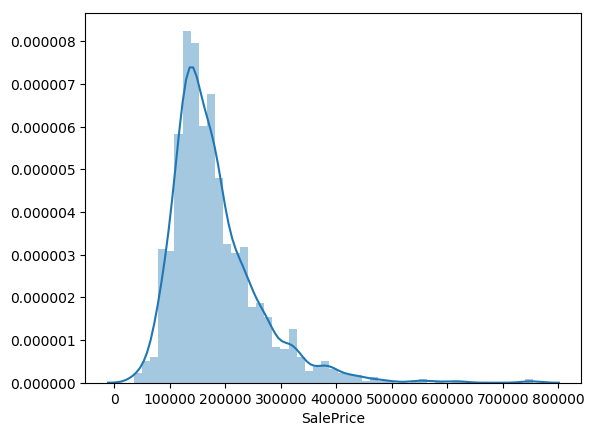

In [60]:
sns.distplot(train["SalePrice"])

In [62]:
# 데이터 개수 
ntrain = train.shape[0]
ntest = test.shape[0]

In [65]:
ytrain = train.SalePrice.values

In [66]:
pd.concat([train, test]).shape

(2919, 80)

In [68]:
allData = pd.concat([train, test]).reset_index(drop=True)
allData.drop(["SalePrice"], axis=1, inplace=True)
allData

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [69]:
allNa = allData.isnull().sum() / len(allData) * 100
allNa

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
                   ...    
LotFrontage      16.649538
LotShape          0.000000
LowQualFinSF      0.000000
MSSubClass        0.000000
MSZoning          0.137033
MasVnrArea        0.787941
M

In [78]:
allNa[allNa != 0].sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
SaleType         0.034258
dtype: float64

In [85]:
allNa = allNa.drop(allNa[allNa == 0].index).sort_values(ascending=False)

In [86]:
missingData = pd.DataFrame({"NA Ratio": allNa})
missingData

,NA Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


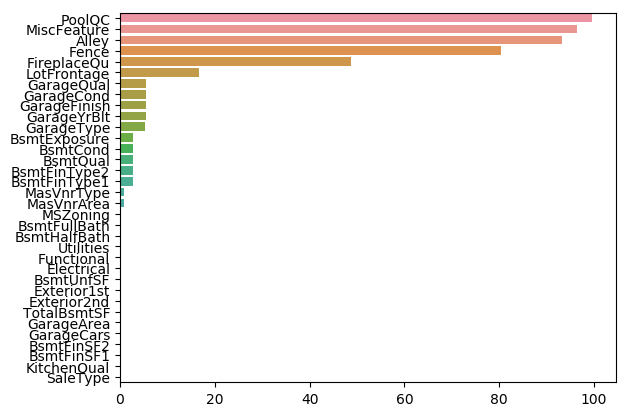

In [97]:
# plt.xticks(rotation="90")
sns.barplot(y=allNa.index, x=allNa, orient="h")